Step 100/1000 - LR: 0.04902 - Loss: 0.5029 - Acc: 0.7785
Step 200/1000 - LR: 0.04618 - Loss: 0.4792 - Acc: 0.7850
Step 300/1000 - LR: 0.04176 - Loss: 0.4721 - Acc: 0.7883
Step 400/1000 - LR: 0.03618 - Loss: 0.4693 - Acc: 0.7883
Step 500/1000 - LR: 0.03000 - Loss: 0.4681 - Acc: 0.7866
Step 600/1000 - LR: 0.02382 - Loss: 0.4675 - Acc: 0.7883
Step 700/1000 - LR: 0.01824 - Loss: 0.4671 - Acc: 0.7915
Step 800/1000 - LR: 0.01382 - Loss: 0.4670 - Acc: 0.7915
Step 900/1000 - LR: 0.01098 - Loss: 0.4668 - Acc: 0.7915
Step 1000/1000 - LR: 0.01000 - Loss: 0.4668 - Acc: 0.7915


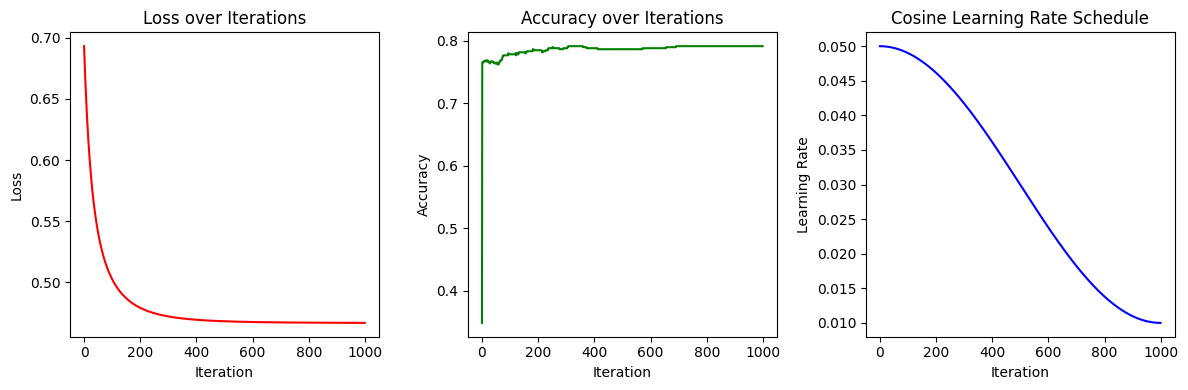


=== Test Metrics ===
Accuracy  : 0.7143
Precision : 0.6136
Recall    : 0.5000
F1 Score  : 0.5510


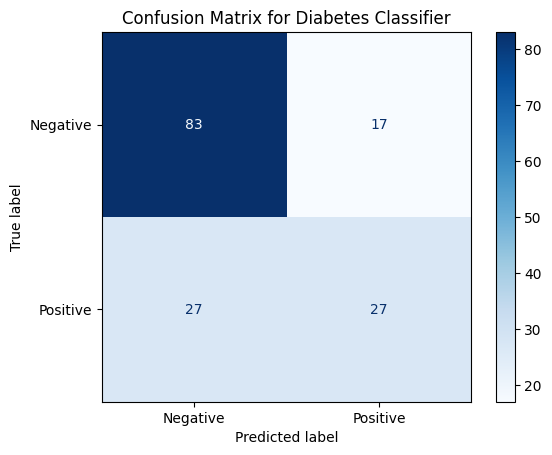

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import math

df = pd.read_csv("/content/diabetes.csv")
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_features = X_train.shape[1]
weights = np.zeros((n_features, 1))
bias = 0.0

# Hyperparameters
base_lr = 0.05
min_lr = 0.01
num_iters = 1000

losses, accuracies, lrs = [], [], []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cosine learning rate scheduler
def cosine_lr_schedule(step, total_steps, base_lr, min_lr):
    """
    Cosine annealing from base_lr to min_lr
    """
    cos_inner = (math.pi * step) / total_steps
    return min_lr + 0.5 * (base_lr - min_lr) * (1 + math.cos(cos_inner))

for step in range(1, num_iters + 1):
    lr = cosine_lr_schedule(step, num_iters, base_lr, min_lr)
    lrs.append(lr)

    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)

    m = len(y_train)
    loss = (-1 / m) * np.sum(
        y_train * np.log(y_pred + 1e-8) + (1 - y_train) * np.log(1 - y_pred + 1e-8)
    )
    losses.append(loss)


    dw = (1 / m) * np.dot(X_train.T, (y_pred - y_train))
    db = (1 / m) * np.sum(y_pred - y_train)

    weights -= lr * dw
    bias -= lr * db

    preds = (y_pred >= 0.5).astype(int)
    acc = np.mean(preds == y_train)
    accuracies.append(acc)

    if step % 100 == 0:
        print(f"Step {step}/{num_iters} - LR: {lr:.5f} - Loss: {loss:.4f} - Acc: {acc:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(losses, color="red")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")

plt.subplot(1,3,2)
plt.plot(accuracies, color="green")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy over Iterations")

plt.subplot(1,3,3)
plt.plot(lrs, color="blue")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.title("Cosine Learning Rate Schedule")

plt.tight_layout()
plt.show()

z_test = np.dot(X_test, weights) + bias
y_pred_test = sigmoid(z_test)
y_pred_labels = (y_pred_test >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_labels)
prec = precision_score(y_test, y_pred_labels)
rec = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print("\n=== Test Metrics ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Diabetes Classifier")
plt.show()


Iter 500/3000  TrainLoss=0.1260  TestLoss=0.1540  TrainAcc=0.9736
Iter 1000/3000  TrainLoss=0.0987  TestLoss=0.1263  TrainAcc=0.9802
Iter 1500/3000  TrainLoss=0.0870  TestLoss=0.1146  TrainAcc=0.9846
Iter 2000/3000  TrainLoss=0.0802  TestLoss=0.1078  TrainAcc=0.9868
Iter 2500/3000  TrainLoss=0.0757  TestLoss=0.1033  TrainAcc=0.9868
Iter 3000/3000  TrainLoss=0.0723  TestLoss=0.1000  TrainAcc=0.9868


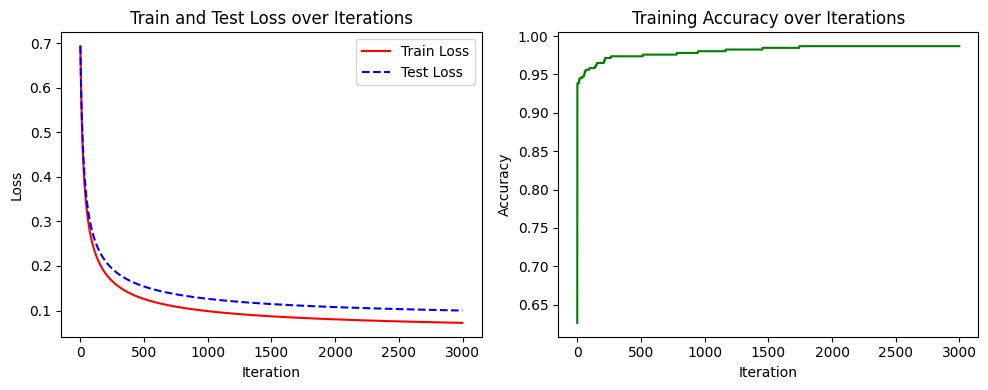


=== Test Metrics (No Penalty) ===
Accuracy  : 0.9737
Precision : 0.9859
Recall    : 0.9722
F1 Score  : 0.9790


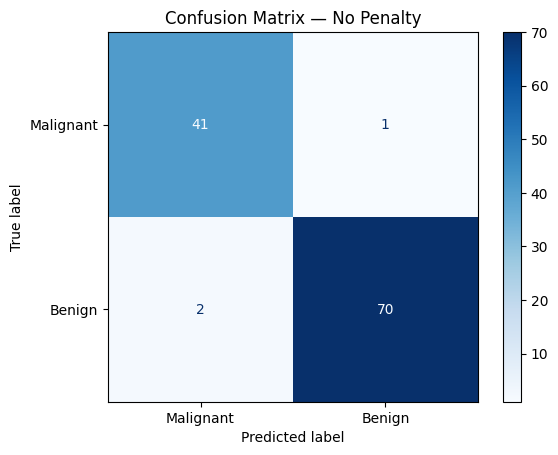

In [24]:
# Problem 2a (with test loss plotted)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

n_features = X_train.shape[1]
weights = np.zeros((n_features, 1))
bias = 0.0
lr = 0.01
num_iters = 3000

train_losses, test_losses, accs = [], [], []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(num_iters):
    z_train = np.dot(X_train, weights) + bias
    y_pred_train = sigmoid(z_train)

    m = len(y_train)
    train_loss = (-1/m) * np.sum(
        y_train*np.log(y_pred_train + 1e-8) + (1 - y_train)*np.log(1 - y_pred_train + 1e-8)
    )
    train_losses.append(train_loss)

    z_test = np.dot(X_test, weights) + bias
    y_pred_test = sigmoid(z_test)
    m_test = len(y_test)
    test_loss = (-1/m_test) * np.sum(
        y_test*np.log(y_pred_test + 1e-8) + (1 - y_test)*np.log(1 - y_pred_test + 1e-8)
    )
    test_losses.append(test_loss)

    dw = (1/m) * np.dot(X_train.T, (y_pred_train - y_train))
    db = (1/m) * np.sum(y_pred_train - y_train)

    weights -= lr * dw
    bias    -= lr * db

    acc = np.mean((y_pred_train >= 0.5).astype(int) == y_train)
    accs.append(acc)

    if (i+1) % 500 == 0:
        print(f"Iter {i+1}/{num_iters}  TrainLoss={train_loss:.4f}  TestLoss={test_loss:.4f}  TrainAcc={acc:.4f}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='red')
plt.plot(test_losses, label='Test Loss', color='blue', linestyle='--')
plt.title("Train and Test Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accs, color='green')
plt.title("Training Accuracy over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

y_pred_final = (y_pred_test >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_final)
prec = precision_score(y_test, y_pred_final)
rec = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print("\n=== Test Metrics (No Penalty) ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_final)
ConfusionMatrixDisplay(cm, display_labels=["Malignant","Benign"]).plot(cmap="Blues")
plt.title("Confusion Matrix — No Penalty")
plt.show()


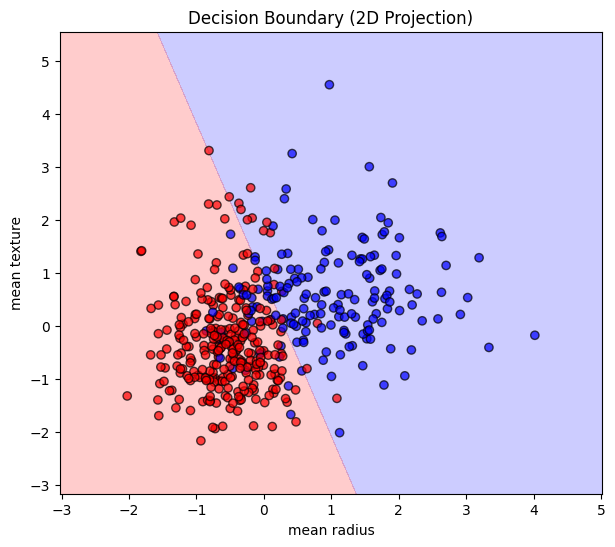

In [13]:
feat1, feat2 = 0, 1
X_vis = X_train[:, [feat1, feat2]]

w2 = np.zeros((2, 1))
b2 = 0
lr = 0.01
for _ in range(2000):
    z = np.dot(X_vis, w2) + b2
    y_pred = 1 / (1 + np.exp(-z))
    dw = np.dot(X_vis.T, (y_pred - y_train)) / len(y_train)
    db = np.mean(y_pred - y_train)
    w2 -= lr * dw
    b2 -= lr * db

x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = 1 / (1 + np.exp(-(w2[0]*xx + w2[1]*yy + b2)))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue','red'])
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_train.flatten(), cmap="bwr", edgecolor="k", alpha=0.7)
plt.title("Decision Boundary (2D Projection)")
plt.xlabel(data.feature_names[feat1])
plt.ylabel(data.feature_names[feat2])
plt.show()


Iter 500/3000  TrainLoss=0.1260  TestLoss=0.1541  TrainAcc=0.9736
Iter 1000/3000  TrainLoss=0.0987  TestLoss=0.1265  TrainAcc=0.9802
Iter 1500/3000  TrainLoss=0.0871  TestLoss=0.1147  TrainAcc=0.9846
Iter 2000/3000  TrainLoss=0.0803  TestLoss=0.1079  TrainAcc=0.9868
Iter 2500/3000  TrainLoss=0.0757  TestLoss=0.1035  TrainAcc=0.9868
Iter 3000/3000  TrainLoss=0.0724  TestLoss=0.1002  TrainAcc=0.9868


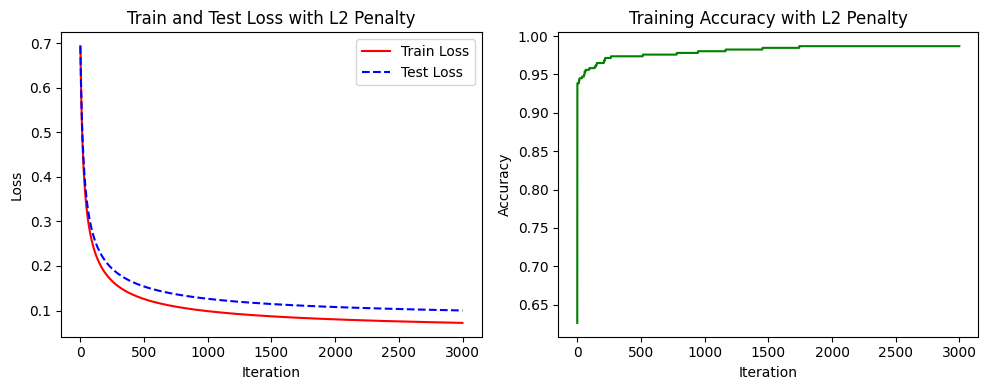


=== Test Metrics (With L2 Penalty) ===
Accuracy  : 0.9737
Precision : 0.9859
Recall    : 0.9722
F1 Score  : 0.9790


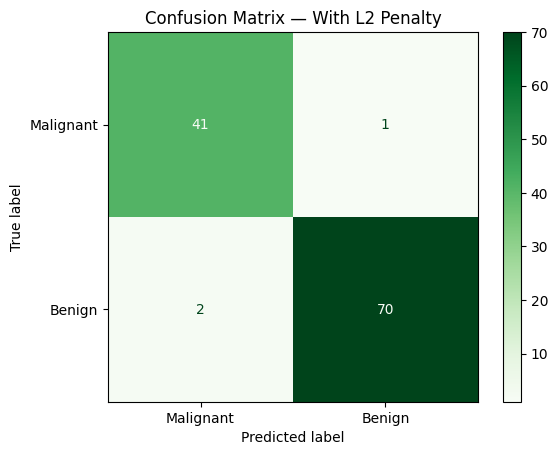

In [30]:
# Problem 2(b) — With Test Loss Added

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

n_features = X_train.shape[1]
weights = np.zeros((n_features, 1))
bias = 0.0
lr = 0.01
num_iters = 3000
lambda_ = 0.01
train_losses, test_losses, accs = [], [], []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for i in range(num_iters):
    z_train = np.dot(X_train, weights) + bias
    y_pred_train = sigmoid(z_train)
    m = len(y_train)

    train_loss = (-1/m) * np.sum(
        y_train*np.log(y_pred_train + 1e-8) + (1 - y_train)*np.log(1 - y_pred_train + 1e-8)
    ) + (lambda_/(2*m))*np.sum(weights**2)
    train_losses.append(train_loss)

    z_test = np.dot(X_test, weights) + bias
    y_pred_test = sigmoid(z_test)
    m_test = len(y_test)
    test_loss = (-1/m_test) * np.sum(
        y_test*np.log(y_pred_test + 1e-8) + (1 - y_test)*np.log(1 - y_pred_test + 1e-8)
    ) + (lambda_/(2*m_test))*np.sum(weights**2)
    test_losses.append(test_loss)

    dw = (1/m)*np.dot(X_train.T, (y_pred_train - y_train)) + (lambda_/m)*weights
    db = (1/m)*np.sum(y_pred_train - y_train)

    weights -= lr * dw
    bias    -= lr * db

    acc = np.mean((y_pred_train >= 0.5).astype(int) == y_train)
    accs.append(acc)

    if (i+1) % 500 == 0:
        print(f"Iter {i+1}/{num_iters}  TrainLoss={train_loss:.4f}  TestLoss={test_loss:.4f}  TrainAcc={acc:.4f}")

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='red')
plt.plot(test_losses, label='Test Loss', color='blue', linestyle='--')
plt.title("Train and Test Loss with L2 Penalty")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accs, color='green')
plt.title("Training Accuracy with L2 Penalty")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

y_pred_final = (y_pred_test >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_final)
prec = precision_score(y_test, y_pred_final)
rec = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print("\n=== Test Metrics (With L2 Penalty) ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_final)
ConfusionMatrixDisplay(cm, display_labels=["Malignant","Benign"]).plot(cmap="Greens")
plt.title("Confusion Matrix — With L2 Penalty")
plt.show()


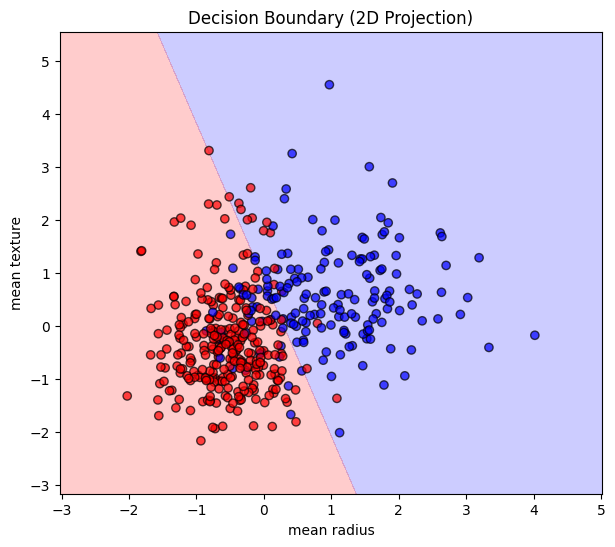

In [16]:
feat1, feat2 = 0, 1  # mean radius, mean texture
X_vis = X_train[:, [feat1, feat2]]

w2 = np.zeros((2, 1))
b2 = 0
lr = 0.01
for _ in range(2000):
    z = np.dot(X_vis, w2) + b2
    y_pred = 1 / (1 + np.exp(-z))
    dw = np.dot(X_vis.T, (y_pred - y_train)) / len(y_train)
    db = np.mean(y_pred - y_train)
    w2 -= lr * dw
    b2 -= lr * db

x_min, x_max = X_vis[:,0].min()-1, X_vis[:,0].max()+1
y_min, y_max = X_vis[:,1].min()-1, X_vis[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = 1 / (1 + np.exp(-(w2[0]*xx + w2[1]*yy + b2)))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue','red'])
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_train.flatten(), cmap="bwr", edgecolor="k", alpha=0.7)
plt.title("Decision Boundary (2D Projection)")
plt.xlabel(data.feature_names[feat1])
plt.ylabel(data.feature_names[feat2])
plt.show()
